<a href="https://colab.research.google.com/github/log-er-ette/DataScienceEcosystem/blob/main/Wood_NAICS_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# General method (if file is in session storage after upload):
df = pd.read_csv('NAICS_321999.csv')

In [4]:
relevant_naics = ['321912', '321920', '321992', '321999'] # Add others as needed
# Ensure NAICS column is string type before checking `.str.startswith` or `.isin`
df['NAICS'] = df['NAICS'].astype(str)
wood_contracts_df = df[df['NAICS'].str.startswith(('321')) |
                       df['NAICS'].isin(relevant_naics)].copy() # Use .isin for specific codes

In [5]:
ne_states = ['ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'PA', 'NJ']
# Assuming a 'Awardee_State' column
ne_wood_contracts_df = wood_contracts_df[wood_contracts_df['Entity State'].isin(ne_states)].copy()

In [20]:
naics_summary = ne_wood_contracts_df.groupby('Entity State')['Action Obligation ($)'].sum().sort_values(ascending=True)
print(naics_summary)

Entity State
CT                                           $12,219.00
NY    $17,003.50$2,352.75$0.00$85,920.00$0.00$0.00$8...
PA    $20,185.72$0.00$129,975.00-$43,400.00$119,664....
ME    $23,310.00-$15,642.30$0.00$23,310.00-$5,041.20...
MA                                $26,910.00-$15,555.45
NJ                                            $6,440.75
Name: Action Obligation ($), dtype: object


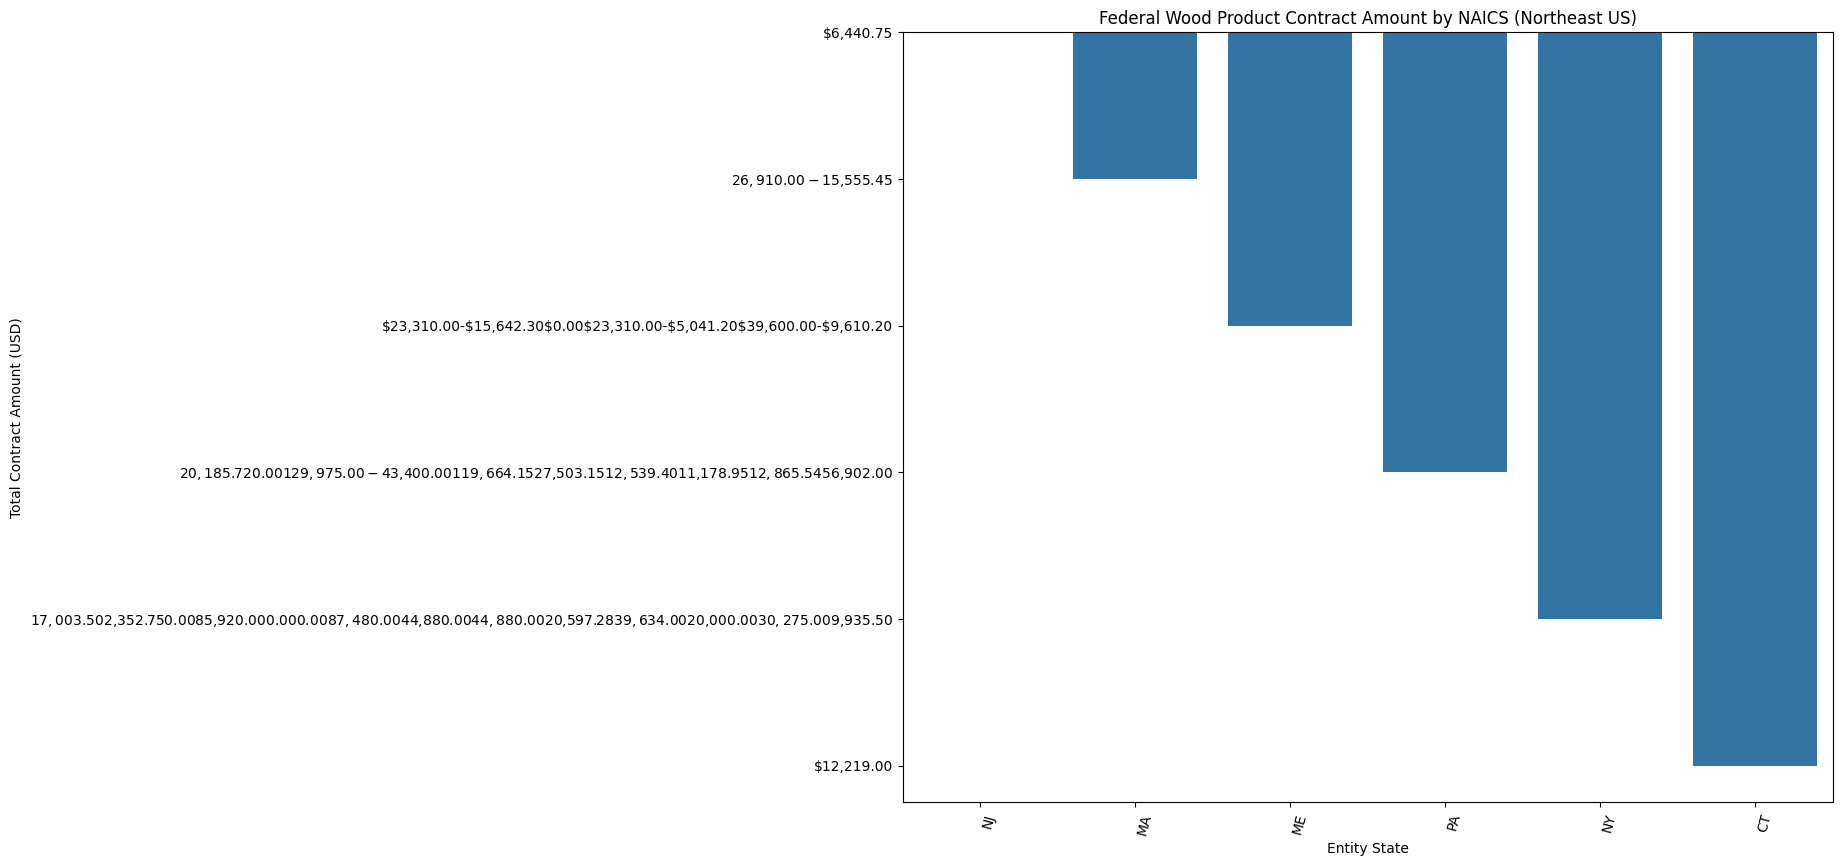

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.barplot(x=naics_summary.index, y=naics_summary.values)
plt.xticks(rotation=75, ha='left')
plt.xlabel('Entity State')
plt.ylabel('Total Contract Amount (USD)')
plt.title('Federal Wood Product Contract Amount by NAICS (Northeast US)')

plt.show()